In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, concat
sns.set_theme(context='notebook', style='white', font_scale=1.33)

In [24]:
stan_models = ['mb_m1','mb_m2a', 'mb_m2b', 'mb_m3']
sessions = [1,2,3]

data = []
for stan_model in stan_models:
    
    for session in sessions:

        df = read_csv(os.path.join('stan_results','mb',f'{stan_model}_s{session}_ppc.tsv'), sep='\t')
        df['model'] = stan_model
        data.append(df)
        
data = concat(data)

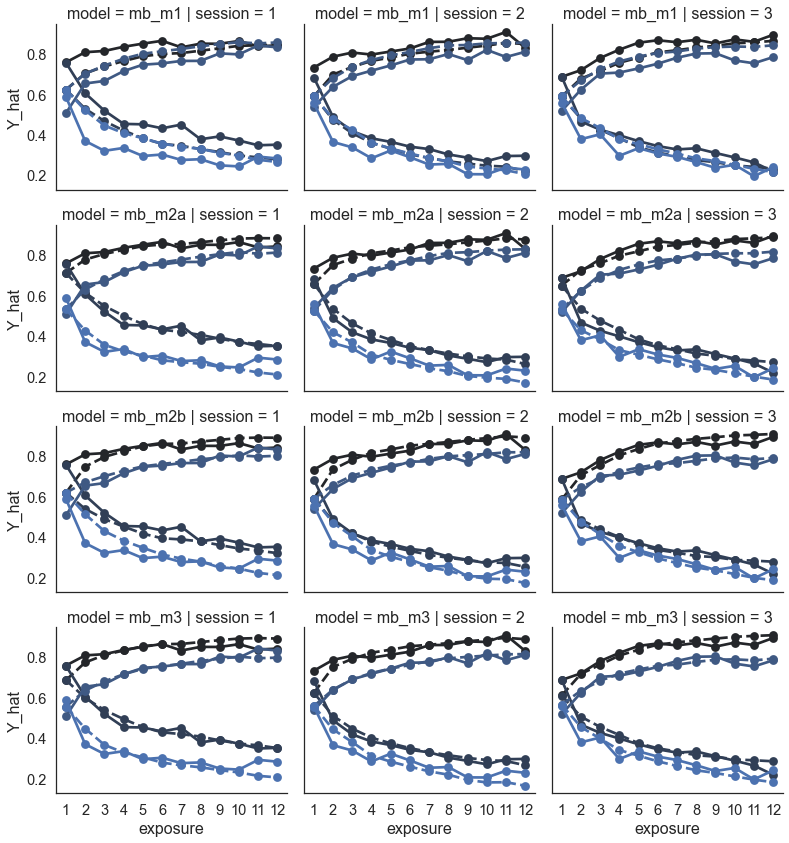

In [27]:
## Initialize canvas.
g = sns.FacetGrid(data, row='model', row_order=stan_models, col='session', col_order=sessions, aspect=1.25)
order = np.arange(12) + 1
hue_order = ['GW','NGW','GAL','NGAL']

g.map(sns.pointplot, 'exposure', 'choice', 'robot', order=order, hue_order=hue_order, ci=None)
g.map(sns.pointplot, 'exposure', 'Y_hat', 'robot', order=order, hue_order=hue_order, ci=None, linestyles='--')

[(-130.0, -100.0)]

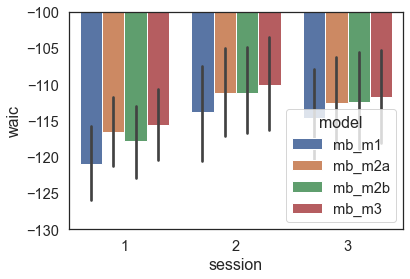

In [31]:
gb = data.groupby(['model','session','subject']).waic.sum().reset_index()

ax = sns.barplot(x='session', y='waic', hue='model', data=gb)
ax.set(ylim=(-130,-100))

[(-130.0, -100.0)]

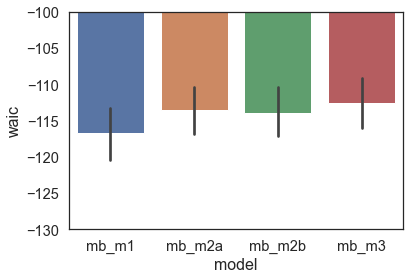

In [55]:
gb = data.groupby(['model','session','subject']).waic.sum().reset_index()

ax = sns.barplot(x='model', y='waic',data=gb)
ax.set(ylim=(-130,-100))

In [33]:
gb.groupby('model').waic.mean()

model
mb_m1    -116.698948
mb_m2a   -113.549613
mb_m2b   -114.002860
mb_m3    -112.627930
Name: waic, dtype: float64

In [41]:
pivot = gb.pivot_table('waic',['session','subject'],'model')

In [44]:
x = pivot['mb_m3'] - pivot['mb_m2a ']

In [54]:
print(x.mean(), x.mean() / (x.std() / np.sqrt(x.size)))

0.9216835983972065 6.465188475037912


In [49]:
from scipy.stats import ttest_1samp

In [53]:
ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=6.465188475037912, pvalue=4.0090102378323345e-10)

In [59]:
s1 = read_csv('stan_results/mb/mb_m3_s1_summary.tsv', sep='\t', index_col='name')
s2 = read_csv('stan_results/mb/mb_m3_s2_summary.tsv', sep='\t', index_col='name')

In [67]:
b11 = s1.T.filter(regex='b1').T['Mean'].values
b12 = s2.T.filter(regex='b1').T['Mean'].values
b21 = s1.T.filter(regex='b2').T['Mean'].values
b22 = s2.T.filter(regex='b2').T['Mean'].values

<AxesSubplot:>

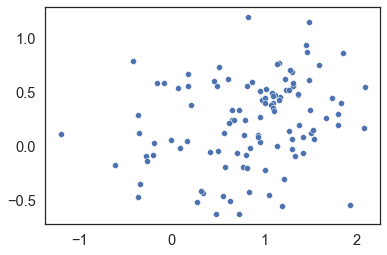

In [72]:
sns.scatterplot(x=b11, y=b21)

In [76]:
df = read_csv('stan_results/mb/mb_m3_s3.tsv.gz', sep='\t', compression='gzip')

<AxesSubplot:xlabel='sigma_pr[4]', ylabel='Count'>

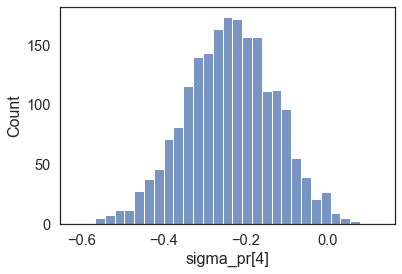

In [80]:
sns.histplot(df['sigma_pr[4]'])